In [69]:
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# SAMPLE_RATE = 44100
SAMPLE_RATE = 16000

# 데이터

In [70]:
wav_dict = {
            '아니요' : 0,
            '네' : 1
            }

In [71]:
wav_files = []

for file in os.listdir(f'./record_yes_no/'):
    wav_files.append(f'./record_yes_no/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no/1.아니요_19.wav,아니요
1,./record_yes_no/1.네_33.wav,네
2,./record_yes_no/1.아니요_준석형_3.wav,아니요
3,./record_yes_no/1.아니요_32.wav,아니요
4,./record_yes_no/1.아니요_16.wav,아니요
...,...,...
143,./record_yes_no/1.네_38.wav,네
144,./record_yes_no/1.네_81.wav,네
145,./record_yes_no/1.네_67.wav,네
146,./record_yes_no/1.네_6.wav,네


In [72]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,./record_yes_no/1.아니요_19.wav,아니요,0
1,./record_yes_no/1.네_33.wav,네,1
2,./record_yes_no/1.아니요_준석형_3.wav,아니요,0
3,./record_yes_no/1.아니요_32.wav,아니요,0
4,./record_yes_no/1.아니요_16.wav,아니요,0
...,...,...,...
143,./record_yes_no/1.네_38.wav,네,1
144,./record_yes_no/1.네_81.wav,네,1
145,./record_yes_no/1.네_67.wav,네,1
146,./record_yes_no/1.네_6.wav,네,1


In [73]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(wav_df,
                                        test_size=0.1,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [74]:
train_data, val_data = train_test_split(train_data,
                                        test_size=0.2,
                                        stratify=train_data['class_label'],
                                        random_state=7)

In [75]:
len(train_data), len(val_data), len(test_data)

(106, 27, 15)

In [76]:
X_train = train_data['path']
y_train = train_data['class_label']

In [77]:
X_val = val_data['path']
y_val = val_data['class_label']

In [78]:
X_test = test_data['path']
y_test = test_data['class_label']

In [79]:
def get_mfcc(path):
    b, _ = librosa.core.load(path, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
        return pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
    except:
        print('bad file')
        return pd.Series([0]*40)

In [80]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = get_mfcc(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00052088 -0.00046095
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01439852 0.01090883 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00391869 0.00162803 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00026784 -0.0004520

In [81]:
features_df

,feature,class_label
0,0 -408.852905 1 125.587387 2 -4.68...,0
1,0 -443.153107 1 127.761795 2 -30.47...,1
2,0 -415.966949 1 117.120995 2 -20.36...,1
3,0 -402.844696 1 89.493431 2 21.37...,1
4,0 -454.677094 1 96.200485 2 23.42...,1
...,...,...
101,0 -481.144043 1 88.528046 2 28.63...,1
102,0 -469.431885 1 130.638016 2 -10.65...,1
103,0 -351.460083 1 132.553391 2 -16.74...,1
104,0 -431.107941 1 114.285660 2 1.22...,1


In [82]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = get_mfcc(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00138241 -0.00103761
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02698768 0.0361002  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00059034 0.00036815 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01681229 0.01639144 0. 

In [83]:
features_val_df

,feature,class_label
0,0 -460.078033 1 91.954239 2 25.58...,1
1,0 -405.207001 1 106.987297 2 22.17...,0
2,0 -396.908264 1 150.149460 2 -22.23...,0
3,0 -382.198090 1 142.000046 2 -27.04...,1
4,0 -389.948730 1 136.645554 2 -11.46...,0
5,0 -465.941620 1 81.124275 2 29.34...,1
6,0 -351.664246 1 130.945038 2 -29.60...,1
7,0 -398.041382 1 111.748024 2 14.53...,1
8,0 -420.848938 1 138.056244 2 -30.56...,1
9,0 -383.177887 1 119.976852 2 2.04...,1


In [84]:
features_test = []

for i, wav in enumerate(X_test):
    mfccs = get_mfcc(wav)
    features_test.append([mfccs, y_test.values[i]])#, y_val[i]])

features_test_df = pd.DataFrame(features_test, columns=['feature', 'class_label'])

/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  9.8152101e-05
 -1.4820133e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00805175 -0.00917145
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00342211 -0.00670582
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.   

In [85]:
features_test_df

,feature,class_label
0,0 -440.982361 1 149.042801 2 -11.51...,0
1,0 -405.221619 1 120.868729 2 -10.44...,0
2,0 -397.318237 1 129.901505 2 -19.38...,0
3,0 -414.129578 1 131.742523 2 2.94...,1
4,0 -419.559326 1 129.042847 2 13.24...,0
5,0 -393.120331 1 120.932335 2 -8.17...,1
6,0 -411.395538 1 118.897171 2 23.36...,1
7,0 -387.543488 1 126.363205 2 -16.11...,1
8,0 -445.830017 1 123.530472 2 -37.13...,1
9,0 -475.523346 1 120.437553 2 -11.75...,1


In [86]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [87]:
X_train.shape

(106, 80)

In [88]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [89]:
X_val.shape

(27, 80)

In [90]:
X_test = np.array(features_test_df.feature.tolist())
y_test = np.array(features_test_df.class_label.tolist())

In [91]:
X_test.shape

(15, 80)

# 모델

In [92]:
#fitting random forest on the dataset
rfc = RandomForestClassifier(n_estimators = 150)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10, shuffle = True)
rfc.fit(X_train, y_train)
#more functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids
#checking the accuracy of the model
print(rfc.score(X_val, y_val))

0.8518518518518519


In [93]:
from sklearn.metrics import accuracy_score

predicted = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

# print(f'Out-of-bag score estimate: {rfc.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.867


In [94]:
rfc.predict_proba(X_test)

array([[0.80666667, 0.19333333],
       [0.68666667, 0.31333333],
       [0.68      , 0.32      ],
       [0.26      , 0.74      ],
       [0.39333333, 0.60666667],
       [0.09333333, 0.90666667],
       [0.24      , 0.76      ],
       [0.24666667, 0.75333333],
       [0.20666667, 0.79333333],
       [0.1       , 0.9       ],
       [0.07333333, 0.92666667],
       [0.05333333, 0.94666667],
       [0.38      , 0.62      ],
       [0.13333333, 0.86666667],
       [0.08      , 0.92      ]])

In [95]:
np.argmax(rfc.predict_proba(X_test)[0])

0

<AxesSubplot: >

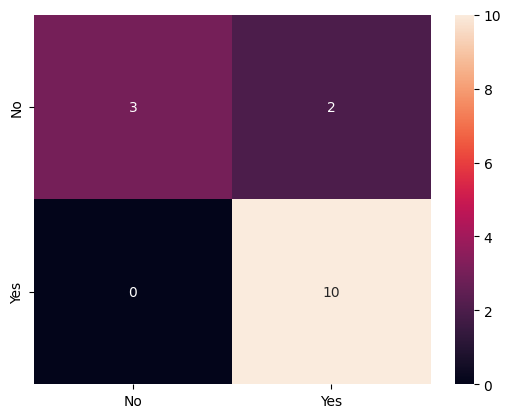

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=wav_dict.keys(), index=wav_dict.keys())
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(cm, annot=True)

# 음성인식

In [97]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [98]:
reverse_dict

{0: '아니요', 1: '네'}

In [99]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = SAMPLE_RATE  # Sample rate
duration = 5  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
recording = recording.flatten()
print(recording.shape)


# Extract MFCCs from microphone recording
listen = []
gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)
mfccs =  pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)


# # Use MFCCs as input to your rfc model
prediction = rfc.predict_proba(X_listen)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

recording...
(80000,)
(1, 80)
[[0.49333333 0.50666667]]
네


/tmp/ipykernel_95613/3589250129.py:17: FutureWarning: Pass y=[ 3.6205611e-06 -1.8364590e-05 -5.2770911e-06 ... -5.5510368e-02
 -5.3791173e-02 -5.3559154e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)


## pyaudio

In [102]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = SAMPLE_RATE

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 5

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

listen = []
mfccs = get_mfcc("./output.wav")
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)


# # Use MFCCs as input to your rfc model
prediction = rfc.predict_proba(X_listen)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

start recording...
recording stopped
(1, 80)
[[0.45333333 0.54666667]]
네


/tmp/ipykernel_95613/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02961731 -0.02798462
 -0.0256958 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
